$ \LARGE \textbf{SCM.254 Introduction to Programming and Data Analysis in Python} $

$ \Large \textbf{Problem Set 3} $

### Name: Your name and lastname
### Program: Your program

# Problem 1

BonCo manufactures and distributes a highly seasonal product. You were tasked to analyze the performance of the sales forecast over the last 9 years. Particularly you are interested in conducting a residuals analysis.

In order to complete your task, follow the steps below:

- Read the Excel file (BonCo.xlsx)
- Create a new column (Residuals). Residuals = Sales - Forecast

Create the following charts:

- Line plot showing the Sales (blue solid line) and Forecast (green dashed line) over time (single chart)
- Line plot showing the Residuals over time
- Histogram of the residuals
- Scatter plot of Residuals (y) vs Forecast (x)  

,Year,Forecast per year
0,2010,1557.455344
1,2011,1517.558461
2,2012,1660.831784
3,2013,1786.677972
4,2014,1857.597642
5,2015,1991.139577
6,2016,2112.230961
7,2017,2071.942107
8,2018,2128.979382


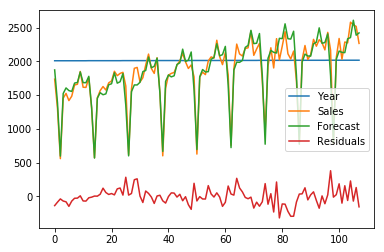

In [32]:
# Write your code here

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

#Read the Excel file (BonCo.xlsx)
BonCoData = pd.read_excel('C:\\Users\\manis\\Desktop\\MIT_Python\\Problem_Set_3\\BonCo.xlsx')

BonCoData.head()

#Create a new column (Residuals). Residuals = Sales - Forecast
BonCoData['Residuals'] = BonCoData['Sales']-BonCoData['Forecast']
BonCoData.head()

BonCoData.plot()


Sales_BonCoData_year = BonCoData['Sales'].groupby(BonCoData['Year']).mean().reset_index(name='Sales per year')

Sales_BonCoData_year


Forecast_BonCoData_year= BonData['Forecast'].groupby(BonData['Year']).mean().reset_index(name='Forecast per year')

Forecast_BonCoData_year



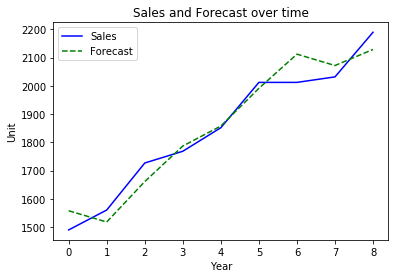

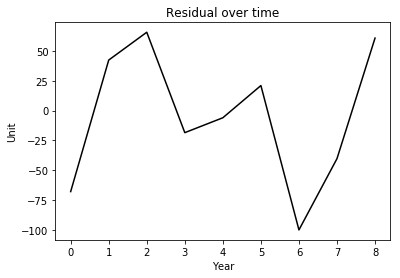

In [37]:

#Line plot showing the Sales (blue solid line) and Forecast (green dashed line) over time (single chart)
Sales_BonCoData_year['Sales per year'].plot(style='b',kind='line')
Forecast_BonCoData_year['Forecast per year'].plot(style='g--',kind='line')
plt.title('Sales and Forecast over time')
plt.ylabel('Unit')
plt.xlabel('Year')
plt.legend(['Sales','Forecast'])
plt.show()

Residuals_BonCoData_year= BonCoData['Residuals'].groupby(BonCoData['Year']).mean().reset_index(name='Residuals per year')


Residuals_BonCoData_year
#Line plot showing the Residuals over time
Residuals_BonCoData_year['Residuals per year'].plot(style='k',kind='line')
plt.title('Residual over time')
plt.ylabel('Unit')
plt.xlabel('Year')
plt.show()


Text(0.5,1,'Scatter Plot of Residuals and Forecast')

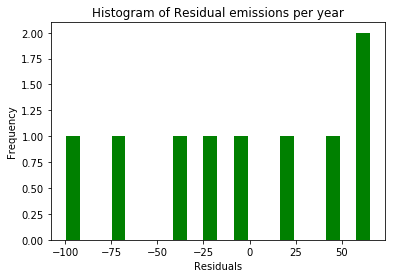

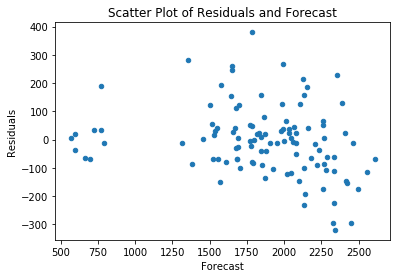

In [40]:

#Histogram of the residuals
Residuals_BonCoData_year['Residuals per year'].plot(kind='hist',bins=20,rwidth=0.9,color='g',title='Histogram of Residual emissions per year')
plt.xlabel('Residuals')
plt.ylabel('Frequency')


#Scatter plot of Residuals (y) vs Forecast (x) 
BonCoData.plot.scatter(x='Forecast',y='Residuals')
plt.title('Scatter Plot of Residuals and Forecast')

# 
# Problem 2

LogCo is a logistics service provider. They just signed a contract with a large manufacturer, making them the exclusive provider of transport services from three of the manufacturer's plants to its six regional warehouses. LogCo has also been contracted to do the logistics planning for this network.

The six regional warehouses face the following demand in number of truckloads per week:

- Providence: 4
- Philadelphia: 15
- Columbus: 5
- Knoxville: 12
- Jacksonville: 3
- Richmond: 8

Since transportation costs are a large part of total costs for the client, the three plants (located in Cincinnati, Atlanta, and Detroit) can adjust production planning to fit the transport network. They do, however, have a capacity limit of producing enough goods to fill 20 truckloads per week (each plant).

LogCo owns and operates two large terminals, one in Scranton, PA, and one in Charlotte, NC.

The transportation costs are given in the table below (An Excel containing the same information can be downloaded from Stellar).

| From/to  | Scranton | Charlotte |
|----------|----------|-----------|
|Cincinnati|    83    |     72    |
| Atlanta  |   122    |     35    |
| Detroit  |    75    |     95    |


| From/to  |Providence|Philadelphia|Columbus|Knowville|Jacksonville|Richmond|
|----------|----------|------------|--------|---------|------------|--------|
| Scranton |    44    |     21     |   73   |    94   |     143    |    61  |         
| Charlote |    124   |     84     |   64   |    35   |      52    |    41  |

Write in Python a mathematical model to minimize the transportation cost to move the goods from the manufacturer's plants to the regional warehouses through the terminals.

In [42]:
from gurobipy import *
import pandas as pd
#Reference https://www.gurobi.com/documentation/8.1/quickstart_mac/py_netflow_py_example.html
Plants = ['Cincinnati', 'Atlanta','Detroit']
Warehouses = ['Providence','Philadelphia','Columbus','Knoxville','Jacksonville','Richmond']
Terminals = ['Scranton', 'Charlotte']

Supply = { 'Cincinnati' : 20,
           'Atlanta' : 20,
           'Detroit' : 20}

Demand = { 'Providence' : 4,
           'Philadelphia' : 15,
           'Columbus' : 5,
           'Knoxville' : 12,
           'Jacksonville' : 3,
           'Richmond' : 8}

arcs, total_cost = multidict({ ('Cincinnati', 'Scranton') : 83,
                               ('Cincinnati', 'Charlotte') : 72,
                               ('Atlanta', 'Scranton') : 122,
                               ('Atlanta', 'Charlotte') : 35,
                               ('Detroit', 'Scranton') : 75,
                               ('Detroit', 'Charlotte') : 95,
                               ('Scranton', 'Providence') : 44,
                               ('Scranton', 'Philadelphia') : 21,
                               ('Scranton', 'Columbus') : 73,
                               ('Scranton', 'Knoxville') : 94,
                               ('Scranton', 'Jacksonville') : 143,
                               ('Scranton', 'Richmond') : 61,
                               ('Charlotte', 'Providence') : 124,
                               ('Charlotte', 'Philadelphia') : 84,
                               ('Charlotte', 'Columbus') : 64,
                               ('Charlotte', 'Knoxville') : 35,
                               ('Charlotte', 'Jacksonville') : 52,
                               ('Charlotte', 'Richmond') : 41})

m = Model('Network Flow Model')

# Decision variables
shipment_flow = m.addVars(arcs, obj=total_cost, name="shipment_flow")

# Supply constraint
SupplyConstraints = m.addConstrs((shipment_flow.sum(plants, "*")
                              <= supply[plants] for plants in plants), 
                              name='SupplyConstraints')

# Demand constraint
DemandConstraint = m.addConstrs((shipment_flow.sum("*", warehouses)
                             >= demand[warehouses] for warehouses in warehouses),
                             name='DemandConstraint')

# Transhipment constraint:FLow coming to Terminal should be the same as going out of terminals..
TransShipmentConstraint = m.addConstrs((shipment_flow.sum("*", terminals) 
                                == shipment_flow.sum(terminals, "*") 
                                for terminals in terminals),
                                name='TransShipmentConstraint')

m.optimize()

# Print solution



if m.status == GRB.Status.OPTIMAL:
    solution = m.getAttr('x', shipment_flow)
print(solution)



Optimize a model with 11 rows, 18 columns and 36 nonzeros
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e+01, 1e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e+00, 2e+01]
Presolve time: 0.01s
Presolved: 11 rows, 18 columns, 36 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   4.700000e+01   0.000000e+00      0s
      10    4.4160000e+03   0.000000e+00   0.000000e+00      0s

Solved in 10 iterations and 0.02 seconds
Optimal objective  4.416000000e+03
{('Cincinnati', 'Scranton'): 0.0, ('Cincinnati', 'Charlotte'): 8.0, ('Atlanta', 'Scranton'): 0.0, ('Atlanta', 'Charlotte'): 20.0, ('Detroit', 'Scranton'): 19.0, ('Detroit', 'Charlotte'): 0.0, ('Scranton', 'Providence'): 4.0, ('Scranton', 'Philadelphia'): 15.0, ('Scranton', 'Columbus'): 0.0, ('Scranton', 'Knoxville'): 0.0, ('Scranton', 'Jacksonville'): 0.0, ('Scranton', 'Richmond'): 0.0, ('Charlotte', 'Providence'): 0.0, ('Charlotte', 'Philadel